# 텐서플로우(google)-산업용
* 이미지 관련 라이브러리
* keras를 이용해 코딩이 쉬움
* 순차적 sequentional, functional, class

# 파이토치(meta)-연구용
* 자연어 관련 라이브러리
* 허깅페이스, 랭체인
* class

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data= data[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

In [8]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [9]:
data['family'] = data['SibSp'] + data['Parch']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [10]:
data = data.drop(['SibSp', 'Parch'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [11]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [12]:
data['Embarked'].mode()[0]

'S'

In [13]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [14]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [15]:
data= pd.get_dummies(data, drop_first=True)
data.head()

,Survived,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,True,False,True
1,1,1,38.0,1,False,False,False
2,1,3,26.0,0,False,False,True
3,1,1,35.0,1,False,False,True
4,0,3,35.0,0,True,False,True


In [17]:
X= data.drop('Survived', axis=1)
y= data['Survived']

In [18]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss= StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled= pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.059160,0.737695,-0.307562,0.615838
1,-1.566107,0.638789,0.059160,-1.355574,-0.307562,-1.623803
2,0.827377,-0.284663,-0.560975,-1.355574,-0.307562,0.615838
3,-1.566107,0.407926,0.059160,-1.355574,-0.307562,0.615838
4,0.827377,0.407926,-0.560975,0.737695,-0.307562,0.615838


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=10)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [30]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       386
           1       0.80      0.67      0.73       238

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.81       624



In [31]:
for i in range(1,20):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i)
    print(classification_report(y_test, pred))

1
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       386
           1       0.74      0.67      0.70       238

    accuracy                           0.78       624
   macro avg       0.77      0.76      0.77       624
weighted avg       0.78      0.78      0.78       624

2
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       386
           1       0.77      0.68      0.72       238

    accuracy                           0.80       624
   macro avg       0.79      0.77      0.78       624
weighted avg       0.80      0.80      0.80       624

3
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       386
           1       0.80      0.67      0.73       238

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.81       624

4
           

# Tensorflow Sequential API를 사용한 순차적 모델

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 딥러닝 신경망 모델 정의

In [35]:
X_train.shape

(267, 6)

In [36]:
X_train.shape[1]  #컬럼개수

6

In [39]:
model =Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  #입력층, input_dim: 독립변수의 컬럼수
model.add(Dense(64, activation='relu')) #은닉층 1번
model.add(Dense(32, activation='relu')) #은닉층 2
model.add(Dense(16, activation='relu')) #은닉층 3
model.add(Dense(1, activation='sigmoid')) #출력층, 이진분류: sigmoid. 다중분류: softmax

# 모델 파라미터 세팅 model.compile()
* loss: 오차 계산 지표
  * 이진분류: binary_crossentropy
  * 다중분류: categorical_crossentropy
  * 데이터에 0이 많은 희소행렬인 경우: sparse_categorical_crossentropy
  * 연속형데이터: (회귀분석): mse
* optimizer: 머신러닝할때 learning_rate -딥러닝 네트워크가 가장 빠르게
  * adam을 가장 많이 사용

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#순차적으로가다가 맞지않으면 역전파 오차가 이진분류일경우 binaryclassentropy
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                224       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


# 모델 훈련
* epochs: 전체 데이터를 한 번 훈련 하는 주기
* batch_size: 전체 데이터를 쪼개서 훈련, 메모리에 맞춰서 크기 조절
* validation_data: 검증 데이터로 모델 검증실시

In [41]:
history = model.fit(X_train, y_train, epochs=200, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/200


2024-09-09 14:15:37.875731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 14:15:37.953726: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 14:15:37.953787: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 1s 45ms/step - loss: 0.6835 - accuracy: 0.6330 - val_loss: 0.6703 - val_accuracy: 0.6939
Epoch 2/200
6/7 [========================>.....] - ETA: 0s - loss: 0.6589 - accuracy: 0.7333

2024-09-09 14:15:38.454057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 14:15:38.480707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 14:15:38.480808: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 0s 24ms/step - loss: 0.6564 - accuracy: 0.7453 - val_loss: 0.6493 - val_accuracy: 0.7212
Epoch 3/200
7/7 [==============================] - 0s 23ms/step - loss: 0.6291 - accuracy: 0.7528 - val_loss: 0.6251 - val_accuracy: 0.7500
Epoch 4/200
7/7 [==============================] - 0s 22ms/step - loss: 0.5984 - accuracy: 0.7603 - val_loss: 0.5931 - val_accuracy: 0.7644
Epoch 5/200
7/7 [==============================] - 0s 22ms/step - loss: 0.5629 - accuracy: 0.7753 - val_loss: 0.5571 - val_accuracy: 0.7788
Epoch 6/200
7/7 [==============================] - 0s 22ms/step - loss: 0.5180 - accuracy: 0.7978 - val_loss: 0.5212 - val_accuracy: 0.7821
Epoch 7/200
7/7 [==============================] - 0s 23ms/step - loss: 0.4768 - accuracy: 0.8127 - val_loss: 0.4887 - val_accuracy: 0.7804
Epoch 8/200
7/7 [==============================] - 0s 22ms/step - loss: 0.4388 - accuracy: 0.8240 - val_loss: 0.4663 - val_accuracy: 0.7901
Epoch 9/200
7/7 [===============

7/7 [==============================] - 0s 23ms/step - loss: 0.2422 - accuracy: 0.8989 - val_loss: 0.6416 - val_accuracy: 0.7885
Epoch 119/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2397 - accuracy: 0.8989 - val_loss: 0.6555 - val_accuracy: 0.7917
Epoch 120/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2398 - accuracy: 0.9026 - val_loss: 0.6616 - val_accuracy: 0.7981
Epoch 121/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2320 - accuracy: 0.8914 - val_loss: 0.6648 - val_accuracy: 0.7869
Epoch 122/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2343 - accuracy: 0.8989 - val_loss: 0.6582 - val_accuracy: 0.7901
Epoch 123/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2324 - accuracy: 0.8989 - val_loss: 0.6719 - val_accuracy: 0.7885
Epoch 124/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2336 - accuracy: 0.8989 - val_loss: 0.6839 - val_accuracy: 0.7853
Epoch 125/200
7/7 [=

Epoch 176/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2142 - accuracy: 0.8951 - val_loss: 0.8257 - val_accuracy: 0.7869
Epoch 177/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2030 - accuracy: 0.9101 - val_loss: 0.8214 - val_accuracy: 0.7869
Epoch 178/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2053 - accuracy: 0.9064 - val_loss: 0.8277 - val_accuracy: 0.7917
Epoch 179/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2001 - accuracy: 0.9026 - val_loss: 0.8271 - val_accuracy: 0.7949
Epoch 180/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2041 - accuracy: 0.9101 - val_loss: 0.8416 - val_accuracy: 0.7869
Epoch 181/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2088 - accuracy: 0.9064 - val_loss: 0.8392 - val_accuracy: 0.7885
Epoch 182/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2009 - accuracy: 0.9176 - val_loss: 0.8491 - val_accuracy: 0.7917
Epoch 

In [ ]:
# 136번째 정확도 90넘어

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 성능을 평가하는 지표는 주로 loss를 본다
*로스는? 회귀에서 회귀선과 데이터의 오차 (mse,sse)
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* 두 지표간에 차이가 있을 경우 loss가 낮은 모델이 우수한 모델

In [44]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

20/20 [==============================] - 0s 5ms/step - loss: 0.8897 - accuracy: 0.7804
test loss 0.8897191882133484
test accuracy 0.7804487347602844


In [ ]:
#로스가 일정기간 변화없으면 로스 낮은거 중간중간 저장하게 만들어야한다

# 딥러닝 학습결과 시각화

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

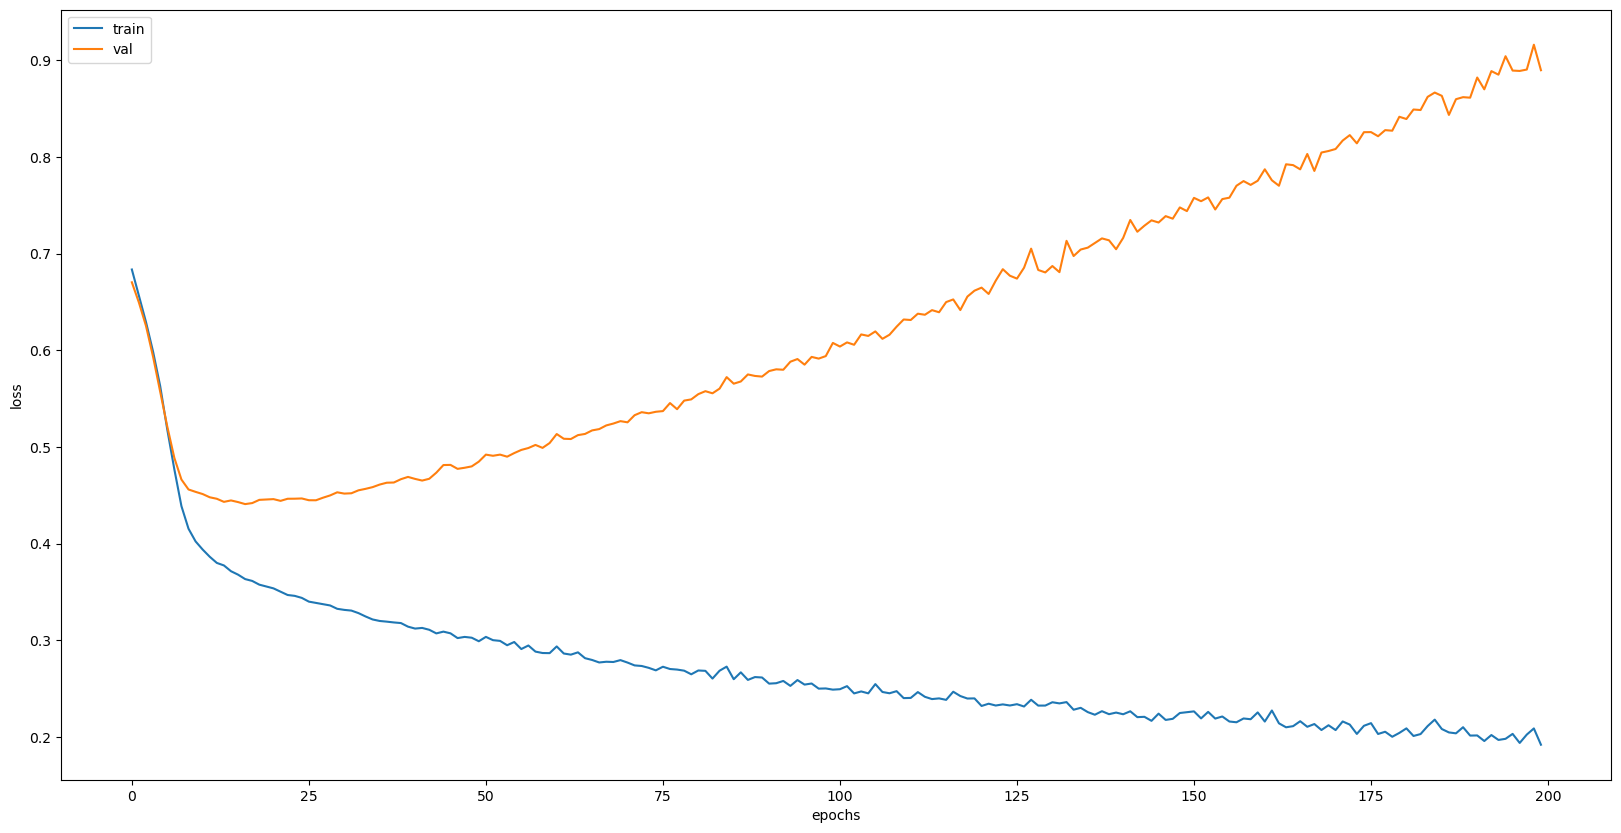

In [46]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [53]:
pred = model.predict(X_test)
pred

20/20 [==============================] - 0s 3ms/step


array([[3.45231891e-02],
       [6.15967475e-02],
       [8.17954689e-02],
       [9.99998093e-01],
       [9.99994397e-01],
       [1.21228337e-01],
       [8.56533423e-02],
       [1.60657614e-02],
       [9.25404802e-02],
       [4.63281758e-02],
       [4.42719873e-04],
       [9.99910831e-01],
       [4.03923020e-02],
       [9.48717445e-02],
       [1.22370094e-03],
       [1.48011732e-03],
       [1.76621995e-06],
       [3.04611051e-04],
       [4.27913755e-01],
       [1.53766721e-01],
       [5.21501992e-03],
       [9.42184776e-03],
       [9.94426966e-01],
       [6.06274046e-03],
       [9.99032497e-01],
       [6.15967475e-02],
       [6.15967475e-02],
       [9.99999642e-01],
       [1.01971189e-02],
       [1.00000000e+00],
       [9.99994397e-01],
       [1.48011732e-03],
       [1.48941562e-01],
       [9.04009736e-04],
       [9.99963045e-01],
       [5.48034087e-02],
       [4.46018457e-01],
       [9.16238832e-07],
       [7.60529563e-02],
       [9.25404802e-02],


In [54]:
pred =pd.DataFrame(pred)
pred

,0
0,0.034523
1,0.061597
2,0.081795
3,0.999998
4,0.999994
...,...
619,0.033116
620,0.999979
621,0.002649
622,0.000084


In [55]:
pred= pred[0].apply(lambda x: 1 if x>=0.7 else 0)
pred

0      0
1      0
2      0
3      1
4      1
      ..
619    0
620    1
621    0
622    0
623    0
Name: 0, Length: 624, dtype: int64

In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       386
           1       0.77      0.59      0.67       238

    accuracy                           0.78       624
   macro avg       0.77      0.74      0.75       624
weighted avg       0.77      0.78      0.77       624



# Tensorflow Functional API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러개 쌓는 형태라 복잡한 모델 생성에 한계가 있어
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(Multi-input), 다중출력(Multi-output)등 복잡한 모델을 정의 할 수 있음
* Input(shape=(독립변수 수))로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력 정의


In [58]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [61]:
inputs = Input(shape=(X_train.shape[1])) #입력층 정의 Input(shape=(독립변수 수,))  #튜플형태로 들어가기에 컴마 적어주기
x = Dense(32, activation='relu')(inputs)  #은닉층 1번
x = Dense(64, activation='relu')(x)  #은닉층2번
x = Dense(32, activation='relu')(x)  #은닉층3번
x = Dense(16, activation='relu')(x)  #은닉층4번
x = Dense(1, activation='sigmoid')(x)  #출력층
model = Model(inputs, x)  #가변인수로 인풋에 여러개 넣을 수 있다는 것이 싴퀀셜과의 차이
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_16 (Dense)            (None, 32)                224       
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable p

In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x >0.5 else 0)
print(classification_report(y_test, pred))

Epoch 1/400


2024-09-09 15:21:09.445287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:21:09.511310: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:21:09.511369: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 89ms/step - loss: 0.7409 - accuracy: 0.3858 - val_loss: 0.7236 - val_accuracy: 0.3734
Epoch 2/400
3/3 [==============================] - 0s 34ms/step - loss: 0.7087 - accuracy: 0.3895 - val_loss: 0.7017 - val_accuracy: 0.3830
Epoch 3/400
1/3 [=========>....................] - ETA: 0s - loss: 0.6896 - accuracy: 0.4100

2024-09-09 15:21:09.782476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:21:09.809166: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:21:09.809227: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 36ms/step - loss: 0.6871 - accuracy: 0.4494 - val_loss: 0.6848 - val_accuracy: 0.4423
Epoch 4/400
3/3 [==============================] - 0s 35ms/step - loss: 0.6676 - accuracy: 0.5730 - val_loss: 0.6693 - val_accuracy: 0.6490
Epoch 5/400
3/3 [==============================] - 0s 33ms/step - loss: 0.6507 - accuracy: 0.7528 - val_loss: 0.6559 - val_accuracy: 0.6843
Epoch 6/400
3/3 [==============================] - 0s 34ms/step - loss: 0.6358 - accuracy: 0.7903 - val_loss: 0.6426 - val_accuracy: 0.7228
Epoch 7/400
3/3 [==============================] - 0s 37ms/step - loss: 0.6210 - accuracy: 0.8015 - val_loss: 0.6293 - val_accuracy: 0.7436
Epoch 8/400
3/3 [==============================] - 0s 35ms/step - loss: 0.6060 - accuracy: 0.8015 - val_loss: 0.6164 - val_accuracy: 0.7788
Epoch 9/400
3/3 [==============================] - 0s 34ms/step - loss: 0.5912 - accuracy: 0.8127 - val_loss: 0.6030 - val_accuracy: 0.7869
Epoch 10/400
3/3 [==============

3/3 [==============================] - 0s 34ms/step - loss: 0.2884 - accuracy: 0.8839 - val_loss: 0.5202 - val_accuracy: 0.8013
Epoch 120/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2894 - accuracy: 0.8839 - val_loss: 0.5188 - val_accuracy: 0.8045
Epoch 121/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2888 - accuracy: 0.8801 - val_loss: 0.5219 - val_accuracy: 0.8013
Epoch 122/400
3/3 [==============================] - 0s 31ms/step - loss: 0.2865 - accuracy: 0.8801 - val_loss: 0.5231 - val_accuracy: 0.7981
Epoch 123/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2853 - accuracy: 0.8876 - val_loss: 0.5267 - val_accuracy: 0.8045
Epoch 124/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2896 - accuracy: 0.8801 - val_loss: 0.5292 - val_accuracy: 0.8045
Epoch 125/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2880 - accuracy: 0.8839 - val_loss: 0.5289 - val_accuracy: 0.8013
Epoch 126/400
3/3 [=

Epoch 177/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2592 - accuracy: 0.8914 - val_loss: 0.6062 - val_accuracy: 0.7949
Epoch 178/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2584 - accuracy: 0.8876 - val_loss: 0.6069 - val_accuracy: 0.7949
Epoch 179/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2619 - accuracy: 0.8914 - val_loss: 0.6090 - val_accuracy: 0.7933
Epoch 180/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2594 - accuracy: 0.8951 - val_loss: 0.6099 - val_accuracy: 0.7949
Epoch 181/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2582 - accuracy: 0.8839 - val_loss: 0.6134 - val_accuracy: 0.7933
Epoch 182/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2596 - accuracy: 0.8876 - val_loss: 0.6143 - val_accuracy: 0.7933
Epoch 183/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2573 - accuracy: 0.8876 - val_loss: 0.6164 - val_accuracy: 0.7917
Epoch 

Epoch 235/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2401 - accuracy: 0.8989 - val_loss: 0.7111 - val_accuracy: 0.7901
Epoch 236/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2409 - accuracy: 0.8989 - val_loss: 0.7120 - val_accuracy: 0.7933
Epoch 237/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2390 - accuracy: 0.8989 - val_loss: 0.7162 - val_accuracy: 0.7869
Epoch 238/400
3/3 [==============================] - 0s 32ms/step - loss: 0.2390 - accuracy: 0.9026 - val_loss: 0.7178 - val_accuracy: 0.7885
Epoch 239/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2366 - accuracy: 0.9026 - val_loss: 0.7200 - val_accuracy: 0.7885
Epoch 240/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2362 - accuracy: 0.9064 - val_loss: 0.7220 - val_accuracy: 0.7885
Epoch 241/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2402 - accuracy: 0.9026 - val_loss: 0.7238 - val_accuracy: 0.7949
Epoch 

Epoch 293/400
3/3 [==============================] - 0s 32ms/step - loss: 0.2223 - accuracy: 0.9101 - val_loss: 0.8290 - val_accuracy: 0.7837
Epoch 294/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2244 - accuracy: 0.8951 - val_loss: 0.8302 - val_accuracy: 0.7837
Epoch 295/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2238 - accuracy: 0.8951 - val_loss: 0.8287 - val_accuracy: 0.7837
Epoch 296/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2229 - accuracy: 0.9064 - val_loss: 0.8300 - val_accuracy: 0.7821
Epoch 297/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2211 - accuracy: 0.9026 - val_loss: 0.8324 - val_accuracy: 0.7837
Epoch 298/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2228 - accuracy: 0.9176 - val_loss: 0.8382 - val_accuracy: 0.7821
Epoch 299/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2250 - accuracy: 0.9026 - val_loss: 0.8524 - val_accuracy: 0.7756
Epoch 

Epoch 351/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2048 - accuracy: 0.9139 - val_loss: 0.9646 - val_accuracy: 0.7772
Epoch 352/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2076 - accuracy: 0.9026 - val_loss: 0.9701 - val_accuracy: 0.7740
Epoch 353/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2063 - accuracy: 0.9064 - val_loss: 0.9778 - val_accuracy: 0.7724
Epoch 354/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2060 - accuracy: 0.9064 - val_loss: 0.9780 - val_accuracy: 0.7756
Epoch 355/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2042 - accuracy: 0.9176 - val_loss: 0.9854 - val_accuracy: 0.7708
Epoch 356/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2033 - accuracy: 0.9176 - val_loss: 0.9836 - val_accuracy: 0.7821
Epoch 357/400
3/3 [==============================] - 0s 37ms/step - loss: 0.2024 - accuracy: 0.9139 - val_loss: 0.9914 - val_accuracy: 0.7756
Epoch 

2024-09-09 15:21:42.874016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [ ]:
plt.figure

# Model Subclassing API로 모델 만들기
* class 형태의 모델 정의 방법
* tf.keras.Model을 상속 받아 작성

In [65]:
class Titanic(tf.keras.Model):
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1= tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(16, activation='relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')
        
        
    def call(self, inputs):
        x= self.dense1(inputs)
        x= self.dense2(x)
        x= self.dense3(x)
        return self.classifier(x)

In [66]:
model = Titanic()

In [67]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=500, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred= pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x>5 else 0)
print(classification_report(y_test,pred))
model.summary()

Epoch 1/200


2024-09-09 15:47:41.152939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:47:41.213639: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:47:41.213701: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 759ms/step - loss: 0.7168 - accuracy: 0.5393 - val_loss: 0.7074 - val_accuracy: 0.5609
Epoch 2/200
1/1 [==============================] - 0s 46ms/step - loss: 0.7009 - accuracy: 0.5955 - val_loss: 0.6943 - val_accuracy: 0.6250
Epoch 3/200
1/1 [==============================] - 0s 48ms/step - loss: 0.6867 - accuracy: 0.6442 - val_loss: 0.6828 - val_accuracy: 0.6699
Epoch 4/200
1/1 [==============================] - 0s 47ms/step - loss: 0.6738 - accuracy: 0.6891 - val_loss: 0.6727 - val_accuracy: 0.7067
Epoch 5/200


2024-09-09 15:47:41.561924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:47:41.587046: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:47:41.587120: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 51ms/step - loss: 0.6623 - accuracy: 0.7116 - val_loss: 0.6639 - val_accuracy: 0.7099
Epoch 6/200
1/1 [==============================] - 0s 48ms/step - loss: 0.6521 - accuracy: 0.7341 - val_loss: 0.6558 - val_accuracy: 0.7244
Epoch 7/200
1/1 [==============================] - 0s 49ms/step - loss: 0.6429 - accuracy: 0.7416 - val_loss: 0.6486 - val_accuracy: 0.7468
Epoch 8/200
1/1 [==============================] - 0s 52ms/step - loss: 0.6345 - accuracy: 0.7790 - val_loss: 0.6419 - val_accuracy: 0.7452
Epoch 9/200
1/1 [==============================] - 0s 52ms/step - loss: 0.6267 - accuracy: 0.7790 - val_loss: 0.6358 - val_accuracy: 0.7532
Epoch 10/200
1/1 [==============================] - 0s 62ms/step - loss: 0.6193 - accuracy: 0.7903 - val_loss: 0.6298 - val_accuracy: 0.7516
Epoch 11/200
1/1 [==============================] - 0s 48ms/step - loss: 0.6121 - accuracy: 0.7903 - val_loss: 0.6236 - val_accuracy: 0.7548
Epoch 12/200
1/1 [============

1/1 [==============================] - 0s 50ms/step - loss: 0.3312 - accuracy: 0.8652 - val_loss: 0.4439 - val_accuracy: 0.8173
Epoch 122/200
1/1 [==============================] - 0s 48ms/step - loss: 0.3307 - accuracy: 0.8652 - val_loss: 0.4441 - val_accuracy: 0.8173
Epoch 123/200
1/1 [==============================] - 0s 46ms/step - loss: 0.3301 - accuracy: 0.8652 - val_loss: 0.4443 - val_accuracy: 0.8173
Epoch 124/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3296 - accuracy: 0.8652 - val_loss: 0.4445 - val_accuracy: 0.8173
Epoch 125/200
1/1 [==============================] - 0s 48ms/step - loss: 0.3291 - accuracy: 0.8652 - val_loss: 0.4448 - val_accuracy: 0.8173
Epoch 126/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3286 - accuracy: 0.8652 - val_loss: 0.4450 - val_accuracy: 0.8173
Epoch 127/200
1/1 [==============================] - 0s 45ms/step - loss: 0.3281 - accuracy: 0.8652 - val_loss: 0.4453 - val_accuracy: 0.8173
Epoch 128/200
1/1 [=

Epoch 179/200
1/1 [==============================] - 0s 47ms/step - loss: 0.3040 - accuracy: 0.8764 - val_loss: 0.4656 - val_accuracy: 0.8125
Epoch 180/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3036 - accuracy: 0.8764 - val_loss: 0.4662 - val_accuracy: 0.8125
Epoch 181/200
1/1 [==============================] - 0s 53ms/step - loss: 0.3032 - accuracy: 0.8764 - val_loss: 0.4668 - val_accuracy: 0.8125
Epoch 182/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3028 - accuracy: 0.8764 - val_loss: 0.4674 - val_accuracy: 0.8125
Epoch 183/200
1/1 [==============================] - 0s 49ms/step - loss: 0.3023 - accuracy: 0.8764 - val_loss: 0.4679 - val_accuracy: 0.8125
Epoch 184/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3019 - accuracy: 0.8764 - val_loss: 0.4684 - val_accuracy: 0.8125
Epoch 185/200
1/1 [==============================] - 0s 48ms/step - loss: 0.3015 - accuracy: 0.8764 - val_loss: 0.4690 - val_accuracy: 0.8125
Epoch 

2024-09-09 15:47:51.817672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [68]:
plt.show()